I'm curious how team play in clutch time compares to their overall performance. 

Clutch time in the NBA is defined as the final 5 minutes of a game when the score is less than 5.

In [2]:
from nba_api.stats.endpoints import LeagueDashTeamClutch

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')


the official nba API doesn't seem to have this data... 


In [4]:
## copy/pasted, with some tweaks, from a previous notebook

import requests
import time

## these should be the urls for advanced statistics, per 100 possessions

def clutch_url(season="2025-26", season_type="Regular Season"):
    url = """https://stats.nba.com/stats/leaguedashteamclutch?AheadBehind=Ahead%20or%20Behind&ClutchTime=Last%205%20Minutes""" + \
            """&College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0""" + \
            """&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Per100Possessions&Period=0""" + \
            f"""&PlayerExperience=&PlayerPosition=&PlusMinus=N&PointDiff=5&Rank=N&Season={season}&SeasonSegment=&SeasonType={season_type}&ShotClockRange=""" + \
            """&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="""
    
    return url

def overall_url(season="2025-26", season_type="Regular Season"):
    url = "https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=" + \
        "&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0" + \
        "&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Per100Possessions&Period=0&PlayerExperience=&" + \
        f"PlayerPosition=&PlusMinus=N&Rank=N&Season={season}&SeasonSegment=&SeasonType={season_type}" + \
        "&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision="
    return url



headers = {
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:145.0) Gecko/20100101 Firefox/145.0",
    'Referer' : "https://www.nba.com",
    'Origin'  : "https://www.nba.com",
    "Sec-GPC" : "1",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-site"
}

def nba_scrape_request(url):
    r = requests.get(url, headers=headers)
    req_json =  r.json()['resultSets'][0]
    df = pd.DataFrame(req_json['rowSet'], columns=req_json['headers'])
    return df


def fetch_seasons(url_func, start_year=15, end_year=26, season_type='Regular Season'):
    years = [x for x in range(start_year, end_year)]

    dataframes = []
    for year in years:
        year_param = "20%d-%d" % (year, year+1)
        url = url_func(year_param, season_type)

        df = nba_scrape_request(url)
        df['SEASON'] = year
        dataframes.append(df)
        print(f"did {year_param}")
        time.sleep(2)

    df = pd.concat(dataframes, ignore_index=True)
    return df

these requests take some time...

In [5]:
clutch_data = fetch_seasons(clutch_url, 10, 26)

did 2010-11
did 2011-12
did 2012-13
did 2013-14
did 2014-15
did 2015-16
did 2016-17
did 2017-18
did 2018-19
did 2019-20
did 2020-21
did 2021-22
did 2022-23
did 2023-24
did 2024-25
did 2025-26


In [6]:
overall_data = fetch_seasons(overall_url, 10, 26)

did 2010-11
did 2011-12
did 2012-13
did 2013-14
did 2014-15
did 2015-16
did 2016-17
did 2017-18
did 2018-19
did 2019-20
did 2020-21
did 2021-22
did 2022-23
did 2023-24
did 2024-25
did 2025-26


this is sometimes erroring out (due to uncached query timeout?) I had to run it a few times to get all the years.

In [7]:
playoff_overall = fetch_seasons(overall_url, 10, 26, 'Playoffs')

did 2010-11
did 2011-12
did 2012-13
did 2013-14
did 2014-15
did 2015-16
did 2016-17
did 2017-18
did 2018-19
did 2019-20
did 2020-21
did 2021-22
did 2022-23
did 2023-24
did 2024-25
did 2025-26


C:\Users\casey\AppData\Local\Temp\ipykernel_3260\1707274537.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dataframes, ignore_index=True)


In [8]:
playoff_overall

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,SEASON
0,1610612737,Atlanta Hawks,12,6,6,0.500,576.0,97.0,100.3,102.5,...,7,12,12,13,6,10,12,15,11,10
1,1610612738,Boston Celtics,9,5,4,0.556,437.0,102.3,104.5,100.5,...,2,11,11,9,16,2,2,7,2,10
2,1610612741,Chicago Bulls,16,9,7,0.563,773.0,101.6,104.8,98.2,...,5,1,3,1,10,11,11,10,4,10
3,1610612742,Dallas Mavericks,21,16,5,0.762,1013.0,110.1,110.7,103.4,...,4,10,8,8,7,1,1,8,1,10
4,1610612743,Denver Nuggets,5,1,4,0.200,240.0,99.8,102.5,106.3,...,11,16,9,14,2,9,9,1,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1610612749,Milwaukee Bucks,5,1,4,0.200,245.0,109.9,111.1,117.2,...,4,16,1,8,5,5,8,5,13,24
236,1610612750,Minnesota Timberwolves,15,9,6,0.600,720.0,110.1,113.6,109.2,...,3,2,9,5,13,4,4,8,5,24
237,1610612752,New York Knicks,18,10,8,0.556,874.0,109.6,112.7,109.9,...,15,4,8,6,6,10,10,9,8,24
238,1610612760,Oklahoma City Thunder,23,16,7,0.696,1109.0,112.2,114.3,103.6,...,9,11,12,12,1,9,7,2,1,24


https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2016-17&SeasonSegment=&SeasonType=Playoffs&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=

In [9]:
overall_data.sample(1)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,SEASON
68,1610612765,Detroit Pistons,82,29,53,0.354,3961.0,100.9,102.7,105.6,...,23,9,21,12,27,19,19,22,24,12


In [10]:
clutch_data.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'SEASON'],
      dtype='object')

In [11]:
overall_data.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'SEASON'],
      dtype='object')

In [12]:
merged_data = pd.merge(overall_data, clutch_data,  on=['TEAM_ID', 'SEASON'], suffixes=[None, '_CLUTCH'])

In [104]:
merged_data = pd.merge(merged_data, playoff_overall,  how='left', on=['TEAM_ID', 'SEASON'], suffixes=[None, '_PLAYOFF'])

In [105]:
merged_data

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_TO_RANK_PLAYOFF,AST_RATIO_RANK_PLAYOFF,OREB_PCT_RANK_PLAYOFF,DREB_PCT_RANK_PLAYOFF,REB_PCT_RANK_PLAYOFF,TM_TOV_PCT_RANK_PLAYOFF,EFG_PCT_RANK_PLAYOFF,TS_PCT_RANK_PLAYOFF,PACE_RANK_PLAYOFF,PIE_RANK_PLAYOFF
0,1610612737,Atlanta Hawks,82,44,38,0.537,3946.0,103.2,105.1,104.6,...,7,7,12,12,13,6,10,12,15,11
1,1610612738,Boston Celtics,82,56,26,0.683,3956.0,104.0,105.5,97.8,...,10,2,11,11,9,16,2,2,7,2
2,1610612766,Charlotte Bobcats,82,34,48,0.415,3961.0,100.8,102.8,104.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1610612741,Chicago Bulls,82,62,20,0.756,3966.0,105.5,107.2,97.4,...,6,5,1,3,1,10,11,11,10,4
4,1610612739,Cleveland Cavaliers,82,19,63,0.232,3951.0,99.5,101.5,109.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1610612758,Sacramento Kings,56,12,44,0.214,2703.0,107.7,109.6,117.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,1610612759,San Antonio Spurs,54,38,16,0.704,2597.0,114.9,117.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,1610612761,Toronto Raptors,55,32,23,0.582,2660.0,111.6,113.8,110.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,1610612762,Utah Jazz,56,18,38,0.321,2718.0,111.8,113.6,119.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How common are clutch games?


there is exactly one winner of every clutch game, so we can count those wins to get the number of games that were in the clutch


In [137]:
season_grouper = merged_data.groupby('SEASON')

percent_clutch = 100 * (season_grouper['W_CLUTCH'].sum() / season_grouper['W'].sum())

percent_clutch

SEASON
10    54.227642
11    51.616162
12    52.237592
13    52.276423
14    50.650407
15    51.788618
16    52.276423
17    51.707317
18    50.406504
19    51.085930
20    48.240741
21    48.292683
22    51.138211
23    46.178862
24    45.528455
25    47.985348
dtype: float64

Text(0, 0.5, 'percent of games')

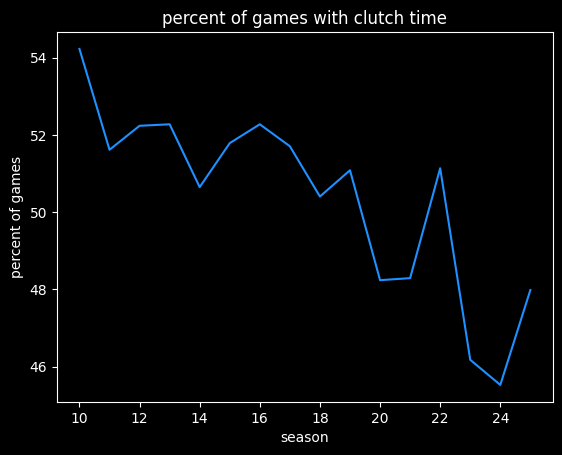

In [139]:
plt.plot(percent_clutch, color='dodgerblue')
plt.title('percent of games with clutch time')
plt.xlabel('season')
plt.ylabel('percent of games')

In [33]:
season_grouper.W_CLUTCH.sum()

SEASON
10    667
11    511
12    642
13    643
14    623
15    637
16    643
17    636
18    620
19    541
20    521
21    594
22    629
23    568
24    560
25    393
Name: W_CLUTCH, dtype: int64

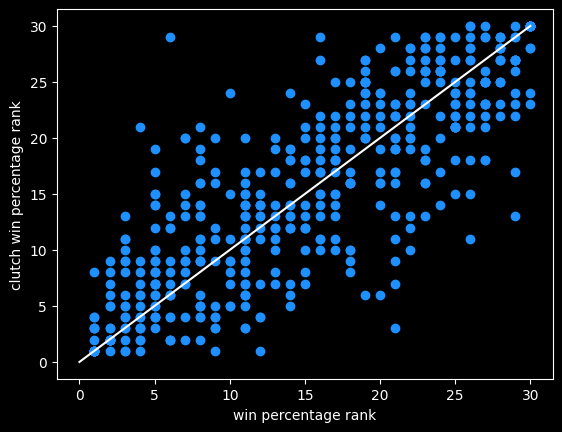

In [17]:
plt.scatter(merged_data.W_PCT_RANK, merged_data.W_PCT_RANK_CLUTCH, color='dodgerblue')
plt.xlabel('win percentage rank')
plt.ylabel('clutch win percentage rank')


_out = plt.plot([0,30], [0,30], color="white")

ok, I need to be plotting the density of each dot.

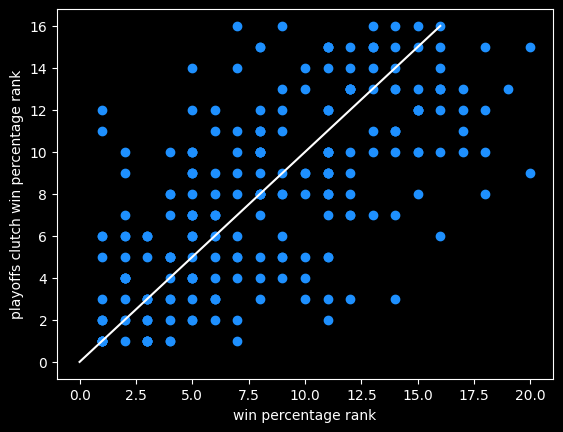

In [107]:
plt.scatter(merged_data.W_PCT_RANK, merged_data.W_PCT_RANK_PLAYOFF, color='dodgerblue')
plt.xlabel('win percentage rank')
plt.ylabel('playoffs clutch win percentage rank')


_out = plt.plot([0,16], [0,16], color="white")


C:\Users\casey\AppData\Local\Temp\ipykernel_3260\795074108.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_data, x="W_PCT_RANK_CLUTCH", y="W_PCT_RANK", cbar=True, palette=palette)


<Axes: xlabel='W_PCT_RANK_CLUTCH', ylabel='W_PCT_RANK'>

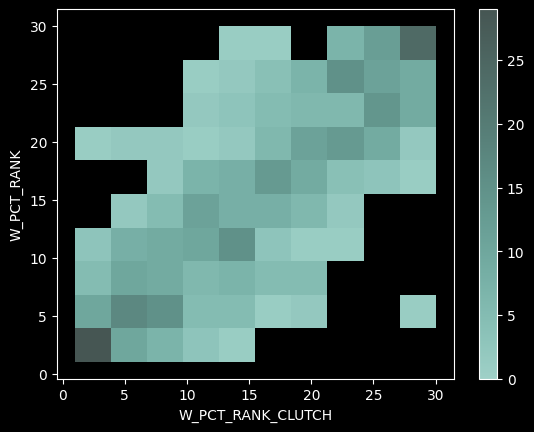

In [108]:
import seaborn as sns
# g = sns.JointGrid(data=merged_with_playoffs, x="W_PCT_RANK_CLUTCH", y="W_PCT_RANK_PLAYOFF")
# g.plot_joint(sns.histplot)

palette = sns.color_palette("rocket_r")
sns.histplot(data=merged_data, x="W_PCT_RANK_CLUTCH", y="W_PCT_RANK", cbar=True, palette=palette)


In [ ]:
#has_playoffs = merged_with_playoffs[~merged_with_playoffs.W_PCT_RANK_PLAYOFF.isna()]

teams tend to have clutch winning percentages close to their overall winning percentages.

it might be worth computing winning percentage in non-clutch games. when is there a significant difference between record in clutch vs. non-clutch games?

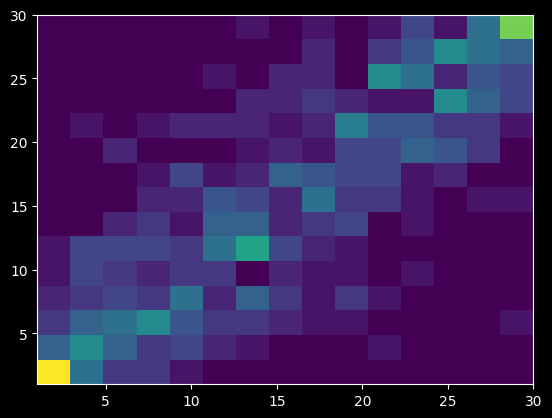

In [109]:
_out = plt.hist2d(merged_data.W_PCT_RANK_CLUTCH, merged_data.W_PCT_RANK, bins=15)

In [22]:
has_playoffs.loc[has_playoffs.W_PCT_RANK_CLUTCH < 4, ['TEAM_NAME', "SEASON", 'W_CLUTCH', 'W_PCT_RANK_CLUTCH','W_PLAYOFF','W_PCT_RANK_PLAYOFF']]

,TEAM_NAME,SEASON,W_CLUTCH,W_PCT_RANK_CLUTCH,W_PLAYOFF,W_PCT_RANK_PLAYOFF
3,Chicago Bulls,10,31,1,9,3
5,Dallas Mavericks,10,34,3,16,1
26,San Antonio Spurs,10,26,2,2,9
33,Chicago Bulls,11,22,1,2,11
42,Los Angeles Lakers,11,31,2,5,9
56,San Antonio Spurs,11,22,3,10,1
62,Brooklyn Nets,12,26,3,3,8
75,Miami Heat,12,32,1,16,2
86,San Antonio Spurs,12,28,2,15,1
101,Indiana Pacers,13,26,2,10,4


here are the clutch win percentages for each NBA champion. They tend to be good teams that don't have a lot of clutch games in the regular season. 

The 2020 Bucks and 2021 Warriors were both outside the top 10 for clutch win percentage.

In [113]:
champs = merged_data[merged_data.W_PLAYOFF == 16]
champs[['TEAM_NAME', "SEASON",'W_PCT_RANK','W_RANK_CLUTCH','W_PCT_RANK_CLUTCH','W_PLAYOFF']]

,TEAM_NAME,SEASON,W_PCT_RANK,W_RANK_CLUTCH,W_PCT_RANK_CLUTCH,W_PLAYOFF
5,Dallas Mavericks,10,4,1,3,16
44,Miami Heat,11,4,10,7,16
75,Miami Heat,12,1,1,1,16
116,San Antonio Spurs,13,1,15,1,16
129,Golden State Warriors,14,1,9,1,16
155,Cleveland Cavaliers,15,3,20,9,16
189,Golden State Warriors,16,1,25,3,16
219,Golden State Warriors,17,3,20,3,16
267,Toronto Raptors,18,2,9,5,16
283,Los Angeles Lakers,19,3,9,4,16


In [111]:
champs.W_PCT_RANK_CLUTCH.describe()

count    15.000000
mean      5.333333
std       4.966555
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      20.000000
Name: W_PCT_RANK_CLUTCH, dtype: float64

In [112]:
champs.W_PCT_RANK.describe()


count    15.000000
mean      2.600000
std       1.723783
min       1.000000
25%       1.000000
50%       3.000000
75%       3.500000
max       7.000000
Name: W_PCT_RANK, dtype: float64





### unedited bELOW HERE

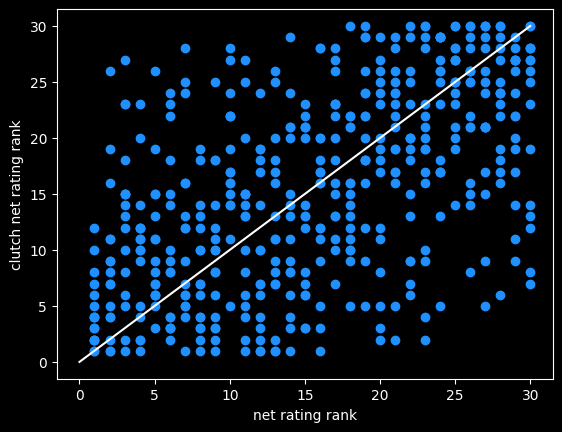

In [26]:
plt.scatter(merged_data.NET_RATING_RANK, merged_data.NET_RATING_RANK_CLUTCH, color='dodgerblue')
plt.xlabel('net rating rank')
plt.ylabel('clutch net rating rank')


_out = plt.plot([0,30], [0,30], color="white")

very good and very bad teams are going to have fewer games played in the clutch. mediocre teams should be involved in the most number of clutch games.

Text(0, 0.5, 'clutch games rank')

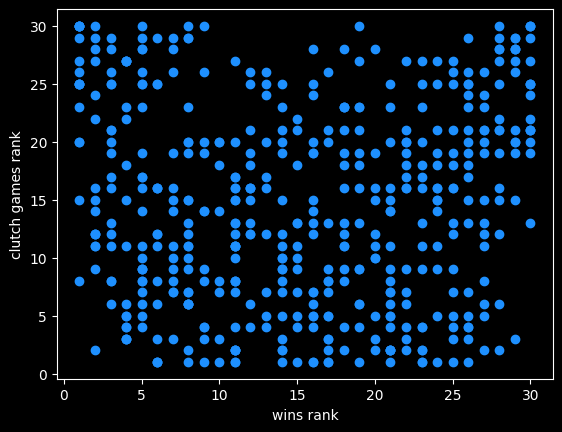

In [27]:
plt.scatter(merged_data.W_RANK, merged_data.GP_RANK_CLUTCH, color='dodgerblue')
plt.xlabel('wins rank')
plt.ylabel('clutch games rank')


#_out = plt.plot([0,30], [0,30], color="white")

bad teams tend to play in more clutch games than good teams.

In [28]:
merged_data.W_RANK.corr(merged_data.GP_RANK_CLUTCH, method='spearman')

np.float64(0.030420956348156416)

not the best viz. just look at top teams


In [29]:
top_teams = merged_data[merged_data.W_RANK < 6]

In [30]:
top_teams.GP_RANK_CLUTCH.describe()

count    91.000000
mean     17.692308
std       8.871543
min       2.000000
25%       9.500000
50%      18.000000
75%      26.000000
max      30.000000
Name: GP_RANK_CLUTCH, dtype: float64

What about teams with a good record that played in a lot of clutch games?

In [31]:
hmm_teams = top_teams[top_teams.GP_RANK_CLUTCH < 9]
hmm_teams[['TEAM_NAME', 'SEASON', 'W_RANK', 'GP_RANK_CLUTCH', 'W_RANK_CLUTCH']]

,TEAM_NAME,SEASON,W_RANK,GP_RANK_CLUTCH,W_RANK_CLUTCH
5,Dallas Mavericks,10,4,5,1
67,Denver Nuggets,12,4,5,2
74,Memphis Grizzlies,12,5,8,5
134,Memphis Grizzlies,14,5,7,2
177,Toronto Raptors,15,4,3,1
181,Boston Celtics,16,4,4,1
207,Toronto Raptors,16,5,4,7
211,Boston Celtics,17,4,6,3
232,Philadelphia 76ers,17,5,8,5
247,Denver Nuggets,18,4,4,1


how well do clutchier-than-expected teams do in the playoffs?

In [38]:
merged_data.SEASON.value_counts()


SEASON
10    30
11    30
12    30
13    30
14    30
15    30
16    30
17    30
18    30
19    30
20    30
21    30
22    30
23    30
24    30
25    30
Name: count, dtype: int64

In [114]:
merged_data.to_csv("merged_nba_team_data.csv")

In [45]:
merged_data['GAMES_CLUTCH'] = merged_data.W_CLUTCH + merged_data.L_CLUTCH

merged_data['PCT_CLUTCH'] = merged_data.GAMES_CLUTCH / (merged_data.W + merged_data.L)

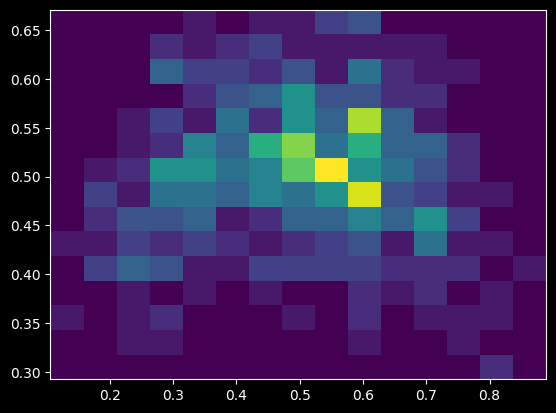

In [ ]:
_out = plt.hist2d( merged_data.W_PCT, merged_data.PCT_CLUTCH,bins=15)
plt.xlabel("winning percentage")

Text(37.722222222222214, 0.5, 'percent of clutch games')

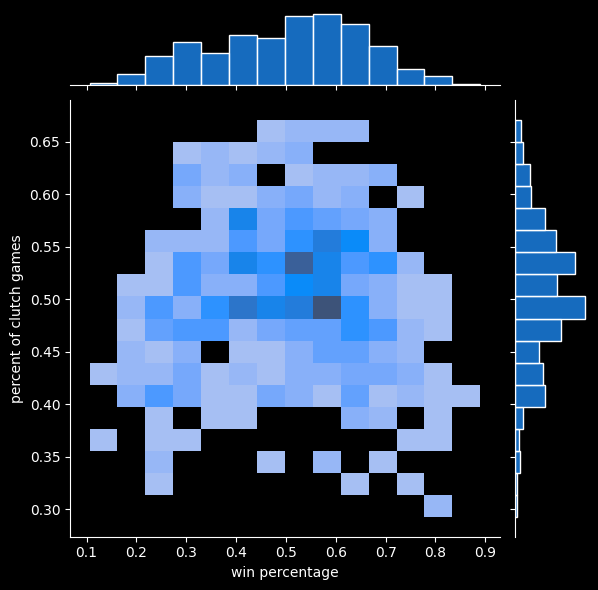

In [ ]:
sns.jointplot(x=merged_data.W_PCT, y=merged_data.PCT_CLUTCH, kind='hist', color='dodgerblue')


#plt.title("NBA regular season, 2010-2025")
plt.xlabel('win percentage')
plt.ylabel('percent of clutch games')
# plt.axhline(merged_data.PCT_CLUTCH.mean(), linestyle='--')
# plt.axvline(merged_data.W_PCT.mean(), linestyle='--')

now plot diff between clutch percentage and non-clutch win percentage

In [70]:
merged_data['W_NONCLUTCH'] = merged_data.W - merged_data.W_CLUTCH
merged_data['L_NONCLUTCH'] = merged_data.L - merged_data.L_CLUTCH

merged_data['W_PCT_NONCLUTCH'] = merged_data.W_NONCLUTCH / (merged_data.W_NONCLUTCH + merged_data.L_NONCLUTCH)

Text(37.722222222222214, 0.5, 'win percentage in clutch games')

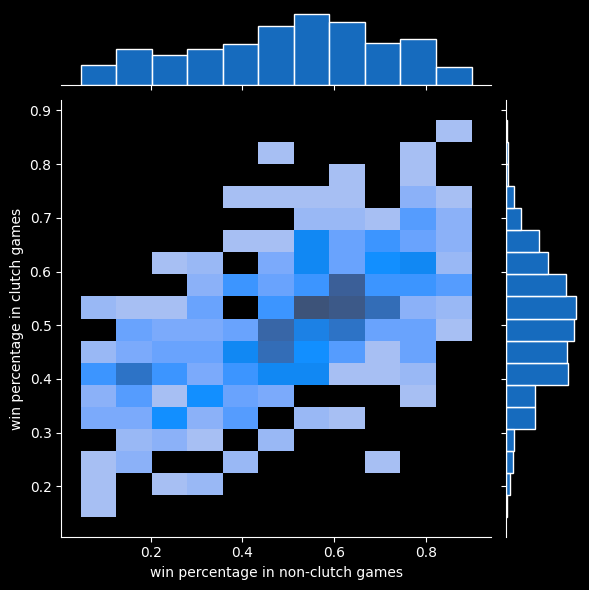

In [75]:


sns.jointplot(x=merged_data.W_PCT_NONCLUTCH, y=merged_data.W_PCT_CLUTCH, kind='hist', color='dodgerblue')
plt.xlabel('win percentage in non-clutch games')
plt.ylabel('win percentage in clutch games')

#plt.scatter(merged_data.W_PCT_CLUTCH, merged_data.W_PCT_NONCLUTCH)

what about offensive and defensive rating in the clutch?

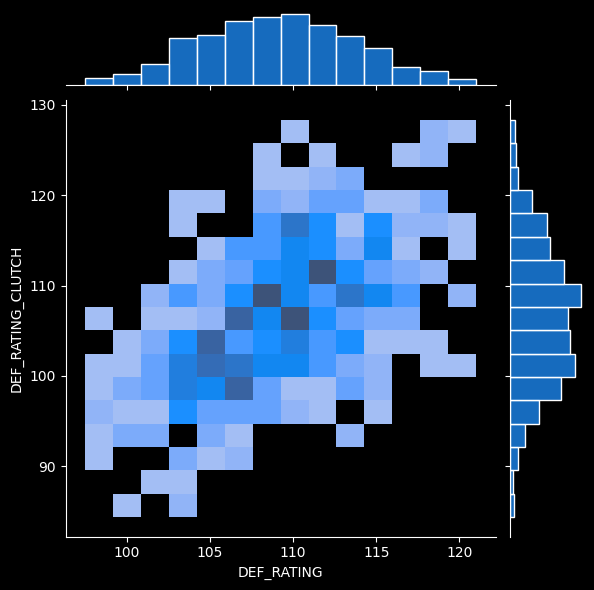

In [77]:

sns.jointplot(x=merged_data.DEF_RATING, y=merged_data.DEF_RATING_CLUTCH, kind='hist', color='dodgerblue')
# plt.xlabel('win percentage in non-clutch games')
# plt.ylabel('win percentage in clutch games')

In [89]:
# note that lower defensive rating = better, higher offensive rating is better

merged_data['DEF_RATING_DIFF'] = merged_data.DEF_RATING_CLUTCH - merged_data.DEF_RATING
merged_data['OFF_RATING_DIFF'] = merged_data.OFF_RATING_CLUTCH - merged_data.OFF_RATING 

In [90]:
merged_data.OFF_RATING_DIFF.describe()

count    480.000000
mean      -2.545417
std        6.685882
min      -23.500000
25%       -7.100000
50%       -2.500000
75%        2.025000
max       17.400000
Name: OFF_RATING_DIFF, dtype: float64

In [91]:
merged_data.DEF_RATING_DIFF.describe()

count    480.000000
mean      -2.492708
std        6.546284
min      -19.400000
25%       -6.950000
50%       -2.600000
75%        1.800000
max       16.800000
Name: DEF_RATING_DIFF, dtype: float64

Text(37.722222222222214, 0.5, 'clutch minus overall offensive rating')

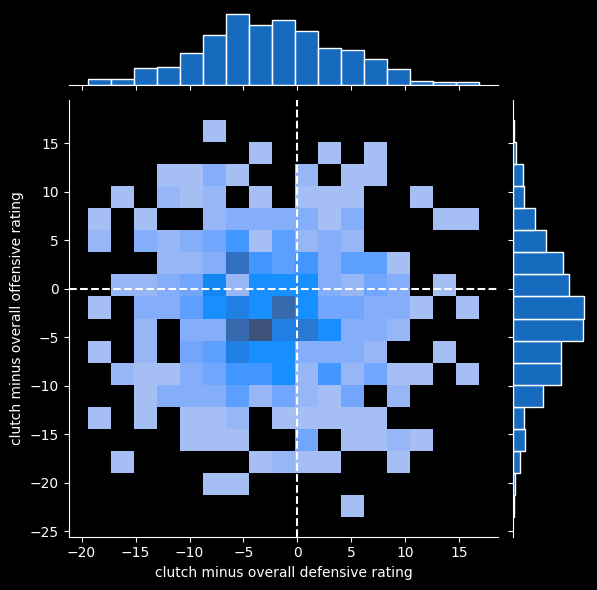

In [93]:
sns.jointplot(x=merged_data.DEF_RATING_DIFF, y=merged_data.OFF_RATING_DIFF, kind='hist', color='dodgerblue')
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.xlabel("clutch minus overall defensive rating")
plt.ylabel("clutch minus overall offensive rating")

In [73]:
merged_data.W_PCT_NONCLUTCH.corr(merged_data.W_PCT_CLUTCH)

np.float64(0.6241929038715334)

In [119]:
clutch_teams = merged_data[(merged_data.DEF_RATING_DIFF < -3) & (merged_data.OFF_RATING_DIFF > 3)]

In [121]:
sorted(clutch_teams.columns)

['AST_PCT',
 'AST_PCT_CLUTCH',
 'AST_PCT_PLAYOFF',
 'AST_PCT_RANK',
 'AST_PCT_RANK_CLUTCH',
 'AST_PCT_RANK_PLAYOFF',
 'AST_RATIO',
 'AST_RATIO_CLUTCH',
 'AST_RATIO_PLAYOFF',
 'AST_RATIO_RANK',
 'AST_RATIO_RANK_CLUTCH',
 'AST_RATIO_RANK_PLAYOFF',
 'AST_TO',
 'AST_TO_CLUTCH',
 'AST_TO_PLAYOFF',
 'AST_TO_RANK',
 'AST_TO_RANK_CLUTCH',
 'AST_TO_RANK_PLAYOFF',
 'DEF_RATING',
 'DEF_RATING_CLUTCH',
 'DEF_RATING_DIFF',
 'DEF_RATING_PLAYOFF',
 'DEF_RATING_RANK',
 'DEF_RATING_RANK_CLUTCH',
 'DEF_RATING_RANK_PLAYOFF',
 'DREB_PCT',
 'DREB_PCT_CLUTCH',
 'DREB_PCT_PLAYOFF',
 'DREB_PCT_RANK',
 'DREB_PCT_RANK_CLUTCH',
 'DREB_PCT_RANK_PLAYOFF',
 'EFG_PCT',
 'EFG_PCT_CLUTCH',
 'EFG_PCT_PLAYOFF',
 'EFG_PCT_RANK',
 'EFG_PCT_RANK_CLUTCH',
 'EFG_PCT_RANK_PLAYOFF',
 'E_DEF_RATING',
 'E_DEF_RATING_CLUTCH',
 'E_DEF_RATING_PLAYOFF',
 'E_NET_RATING',
 'E_NET_RATING_CLUTCH',
 'E_NET_RATING_PLAYOFF',
 'E_OFF_RATING',
 'E_OFF_RATING_CLUTCH',
 'E_OFF_RATING_PLAYOFF',
 'E_PACE',
 'E_PACE_CLUTCH',
 'E_PACE_PLAYOFF',
 '

In [122]:
clutch_teams[['TEAM_NAME', 'SEASON', 'W', 'L', 'DEF_RATING_DIFF', 'OFF_RATING_DIFF', 'W_PLAYOFF']]

,TEAM_NAME,SEASON,W,L,DEF_RATING_DIFF,OFF_RATING_DIFF,W_PLAYOFF
2,Charlotte Bobcats,10,34,48,-8.4,8.0,NaN
3,Chicago Bulls,10,62,20,-5.2,4.0,9
4,Cleveland Cavaliers,10,19,63,-6.6,11.5,NaN
5,Dallas Mavericks,10,57,25,-13.0,8.8,16
28,Utah Jazz,10,39,43,-3.1,7.3,NaN
30,Atlanta Hawks,11,40,26,-7.5,5.6,2
40,Indiana Pacers,11,42,24,-12.8,5.2,6
42,Los Angeles Lakers,11,41,25,-8.4,10.8,5
51,Orlando Magic,11,37,29,-6.2,4.6,1
67,Denver Nuggets,12,57,25,-3.3,3.5,2


In [133]:
clutch_teams[clutch_teams.L > clutch_teams.W]

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_TO_RANK_PLAYOFF,AST_RATIO_RANK_PLAYOFF,OREB_PCT_RANK_PLAYOFF,DREB_PCT_RANK_PLAYOFF,REB_PCT_RANK_PLAYOFF,TM_TOV_PCT_RANK_PLAYOFF,EFG_PCT_RANK_PLAYOFF,TS_PCT_RANK_PLAYOFF,PACE_RANK_PLAYOFF,PIE_RANK_PLAYOFF
2,1610612766,Charlotte Bobcats,82,34,48,0.415,3961.0,100.8,102.8,104.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1610612739,Cleveland Cavaliers,82,19,63,0.232,3951.0,99.5,101.5,109.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1610612762,Utah Jazz,82,39,43,0.476,3976.0,104.9,107.0,107.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,1610612755,Philadelphia 76ers,82,19,63,0.232,3971.0,96.8,99.0,107.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,1610612758,Sacramento Kings,82,27,55,0.329,3951.0,101.1,103.1,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,1610612766,Charlotte Hornets,72,33,39,0.458,3471.0,108.1,110.1,110.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,1610612762,Utah Jazz,82,37,45,0.451,3961.0,112.7,115.3,113.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,1610612766,Charlotte Hornets,82,21,61,0.256,3946.0,107.1,108.6,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,1610612741,Chicago Bulls,82,39,43,0.476,3996.0,112.4,114.0,113.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,1610612762,Utah Jazz,82,31,51,0.378,3961.0,112.0,114.5,117.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
clutch_teams[clutch_teams.TEAM_NAME == 'Dallas Mavericks'][['SEASON']]

,SEASON
5,10
126,14
156,15
396,23


In [116]:
clutch_teams.W_PCT_NONCLUTCH.describe()

count    51.000000
mean      0.557662
std       0.202413
min       0.090909
25%       0.468027
50%       0.540541
75%       0.704613
max       0.895833
Name: W_PCT_NONCLUTCH, dtype: float64

In [123]:
clutch_playoffs = clutch_teams[~clutch_teams.W_PLAYOFF.isna()]

In [126]:
clutch_playoffs.W_PLAYOFF.mean()

np.float64(5.775)

In [128]:
any_playoffs = merged_data[~merged_data.W_PLAYOFF.isna()]

any_playoffs.W_PLAYOFF.mean()


np.float64(5.225)

In [136]:
champs

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_TO_RANK_PLAYOFF,AST_RATIO_RANK_PLAYOFF,OREB_PCT_RANK_PLAYOFF,DREB_PCT_RANK_PLAYOFF,REB_PCT_RANK_PLAYOFF,TM_TOV_PCT_RANK_PLAYOFF,EFG_PCT_RANK_PLAYOFF,TS_PCT_RANK_PLAYOFF,PACE_RANK_PLAYOFF,PIE_RANK_PLAYOFF
5,1610612742,Dallas Mavericks,82,57,25,0.695,3941.0,107.6,108.4,102.3,...,3,4,10,8,8,7,1,1,8,1
44,1610612748,Miami Heat,66,46,20,0.697,3208.0,104.3,105.6,97.1,...,8,8,8,12,9,7,3,3,11,1
75,1610612748,Miami Heat,82,66,16,0.805,3976.0,110.3,111.4,100.5,...,5,2,8,14,10,7,1,1,12,2
116,1610612759,San Antonio Spurs,82,62,20,0.756,3951.0,108.2,109.5,100.1,...,3,3,12,8,7,4,2,2,5,1
129,1610612744,Golden State Warriors,82,67,15,0.817,3946.0,109.7,110.4,98.2,...,6,1,6,11,6,14,1,1,5,1
155,1610612739,Cleveland Cavaliers,82,57,25,0.695,3971.0,108.1,110.2,102.3,...,6,5,3,2,2,7,1,1,11,2
189,1610612744,Golden State Warriors,82,67,15,0.817,3956.0,113.2,114.8,101.1,...,1,2,8,8,4,7,2,2,2,1
219,1610612744,Golden State Warriors,82,58,24,0.707,3946.0,112.3,112.8,104.2,...,1,1,9,11,3,4,2,2,8,1
267,1610612761,Toronto Raptors,82,58,24,0.707,3976.0,110.9,112.6,104.3,...,6,6,14,9,12,4,4,4,12,4
283,1610612747,Los Angeles Lakers,71,52,19,0.732,3418.0,109.6,111.7,103.8,...,6,1,2,7,2,15,2,2,11,1
